<a href="https://colab.research.google.com/github/RareDiseaseData/Meta-analysis-data/blob/main/simulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Packages

In [142]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Read data

In [143]:
df = pd.read_csv("content/Hyl_Patient_data.csv")
df

,ID,Author,Year,Title,Cell1,Cell2,Age,Sex,Type,n,...,Method,Control vs patient vs aggregate,Measurement,%hydroxylysine_ind,%hydroxylysine_per_n1,%hydoxylation_per_n2,STD_n1,STD_n2,STD simulated from regression,STD combined
0,6,"Bleckmann, H.;Kresse, H.;Wollensak, J.;Buddeck...",1971,[Glycosaminoglycan and collagen analyses in os...,2,2,2,1,9,1.0,...,1,1,1,0.465116,NaN,NaN,NaN,NaN,0.093500,NaN
1,8,"Eastoe, J. E.;Martens, P.;Thomas, N. R.",1973,The amino-acid composition of human hard tissu...,2,3,1,1,2,1.0,...,2,1,1,0.219020,NaN,NaN,NaN,NaN,0.083326,NaN
2,15,"Trelstad, R. L.;Rubin, D.;Gross, J.",1977,Osteogenesis imperfecta congenita: evidence fo...,1,1,1,2,2,3.0,...,5,1,1,0.218750,0.314373,0.314373,0.00587,0.00587,NaN,NaN
3,15,"Trelstad, R. L.;Rubin, D.;Gross, J.",1977,Osteogenesis imperfecta congenita: evidence fo...,2,2,1,2,2,NaN,...,3,1,1,0.371429,NaN,NaN,NaN,NaN,0.041000,NaN
4,15,"Trelstad, R. L.;Rubin, D.;Gross, J.",1978,Osteogenesis imperfecta congenita: evidence fo...,2,3,1,2,2,NaN,...,3,1,1,0.352941,NaN,NaN,NaN,NaN,0.037900,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,158,"Lehmann, H. W.;Rimek, D.;Bodo, M.;Brenner, R. ...",1995,Hydroxylation of collagen type I: evidence tha...,1,1,5,3,4,NaN,...,5,1,1,0.370504,NaN,NaN,NaN,NaN,0.044100,NaN
65,158,"Lehmann, H. W.;Rimek, D.;Bodo, M.;Brenner, R. ...",1995,Hydroxylation of collagen type I: evidence tha...,1,1,5,3,4,NaN,...,5,1,1,0.412710,NaN,NaN,NaN,NaN,0.051200,NaN
66,158,"Lehmann, H. W.;Rimek, D.;Bodo, M.;Brenner, R. ...",1995,Hydroxylation of collagen type I: evidence tha...,1,1,5,3,4,NaN,...,5,1,1,0.423261,NaN,NaN,NaN,NaN,0.053000,NaN
67,158,"Lehmann, H. W.;Rimek, D.;Bodo, M.;Brenner, R. ...",1995,Hydroxylation of collagen type I: evidence tha...,1,1,5,3,4,NaN,...,5,1,1,0.425180,NaN,NaN,NaN,NaN,0.053300,NaN


## Preprocessing

In [144]:
df.columns

Index(['ID', 'Author', 'Year', 'Title', 'Cell1', 'Cell2', 'Age', 'Sex', 'Type',
       'n', 'n2', 'Contains std', 'type of comparaison', 'Method',
       'Control vs patient vs aggregate', 'Measurement', '%hydroxylysine_ind',
       '%hydroxylysine_per_n1', '%hydoxylation_per_n2', 'STD_n1', 'STD_n2',
       'STD simulated from regression', 'STD combined'],
      dtype='object')

In [145]:
df_sel = df[[
    'ID',
    'Cell1', # 1 fibroblast or 2 bone 
    'Age', 
    'Sex', 
    'Type', # severity of the pain (not linear)
    'n', 
    'Method', # quemistry method used for the extraction
    '%hydroxylysine_ind', # outcome for ipd
    'STD_n1', # within study std
    'STD_n2' # within study std within type
  ]]
df_sel

,ID,Cell1,Age,Sex,Type,n,Method,%hydroxylysine_ind,STD_n1,STD_n2
0,6,2,2,1,9,1.0,1,0.465116,NaN,NaN
1,8,2,1,1,2,1.0,2,0.219020,NaN,NaN
2,15,1,1,2,2,3.0,5,0.218750,0.00587,0.00587
3,15,2,1,2,2,NaN,3,0.371429,NaN,NaN
4,15,2,1,2,2,NaN,3,0.352941,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
64,158,1,5,3,4,NaN,5,0.370504,NaN,NaN
65,158,1,5,3,4,NaN,5,0.412710,NaN,NaN
66,158,1,5,3,4,NaN,5,0.423261,NaN,NaN
67,158,1,5,3,4,NaN,5,0.425180,NaN,NaN


In [146]:
df_sel[df_sel.ID == 61] # aggregate; maybe something went wrong here

,ID,Cell1,Age,Sex,Type,n,Method,%hydroxylysine_ind,STD_n1,STD_n2
15,61,1,2,3,1,3.0,5,0.129901,0.008515,0.008515
16,61,1,1,3,2,5.0,5,0.260990,0.015050,0.015050
17,61,1,5,3,3,12.0,5,0.140198,0.020990,0.020990
18,61,1,5,3,4,3.0,5,0.121188,0.010495,0.010495
19,61,2,2,3,1,3.0,3,0.134257,0.010693,0.010693
20,61,2,1,3,2,5.0,3,0.271683,0.021782,0.021782
21,61,2,5,3,3,12.0,3,0.114455,0.016634,0.016634
22,61,2,5,3,4,3.0,3,0.152079,0.011881,0.011881


In [147]:
df_sel[df_sel.ID == 75] # Did not report the method, values significantly lower
df_sel.loc[df_sel.ID == 75, 'Method'] = -1
df_sel[df_sel.ID == 75]

,ID,Cell1,Age,Sex,Type,n,Method,%hydroxylysine_ind,STD_n1,STD_n2
24,75,1,3,3,9,3.0,-1,0.241,0.045,0.045
25,75,1,1,3,9,NaN,-1,0.196,NaN,NaN
26,75,1,4,3,9,NaN,-1,0.151,NaN,NaN


In [148]:
idx = df_sel.loc[(df_sel.ID == 61) | (df_sel.ID == 75)].index
df_sel['errors'] = 0
df_sel.iloc[idx] = 1

C:\Users\bena8\AppData\Local\Temp\ipykernel_2616\4216655815.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sel['errors'] = 0


## Roadmap

- [x] Empirical distribution (https://machinelearningmastery.com/empirical-distribution-function-in-python/)

##############################

- [ ] Check distribution of each column (normal, Bernoulli (maybe others))
- [ ] Generate data based on those distributions 🙂

##############################

- [ ] Statistical test for normality

- [ ] Get mean and std if normal and simulate data from those values

- [ ] Oversampling methods (SMOTE)

- [ ] Clusters or Groups

  - [ ] Apply some techniques for simulate data from above

## Base dataframe

In [149]:
df_final = df_sel[[
  'ID',
  'Cell1',
  'Age',
  'Sex',
  'Type',
  'Method',
  '%hydroxylysine_ind',
  'errors'
]]
df_final

,ID,Cell1,Age,Sex,Type,Method,%hydroxylysine_ind,errors
0,6,2,2,1,9,1,0.465116,0
1,8,2,1,1,2,2,0.219020,0
2,15,1,1,2,2,5,0.218750,0
3,15,2,1,2,2,3,0.371429,0
4,15,2,1,2,2,3,0.352941,0
...,...,...,...,...,...,...,...,...
64,158,1,5,3,4,5,0.370504,0
65,158,1,5,3,4,5,0.412710,0
66,158,1,5,3,4,5,0.423261,0
67,158,1,5,3,4,5,0.425180,0


c:\Users\bena8\mambaforge\envs\py11\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 640x480 with 0 Axes>

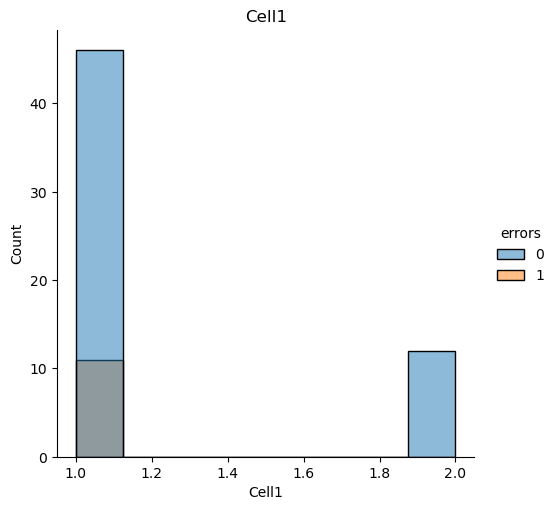

c:\Users\bena8\mambaforge\envs\py11\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 640x480 with 0 Axes>

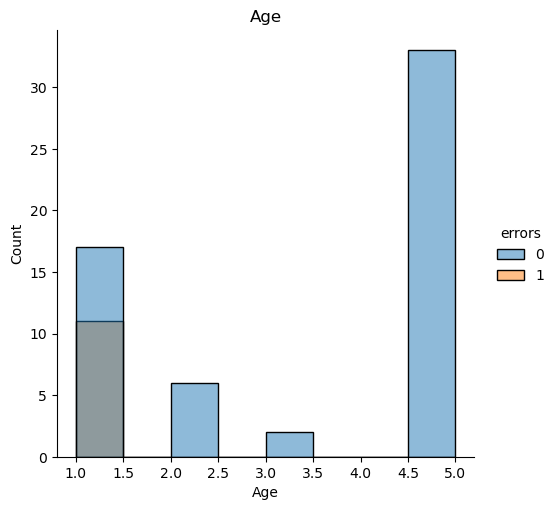

c:\Users\bena8\mambaforge\envs\py11\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 640x480 with 0 Axes>

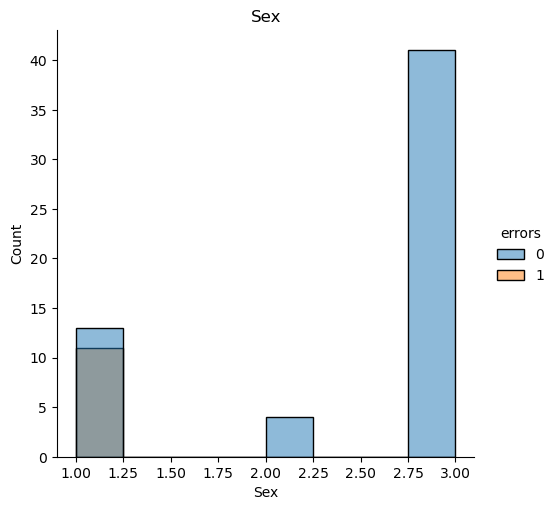

c:\Users\bena8\mambaforge\envs\py11\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 640x480 with 0 Axes>

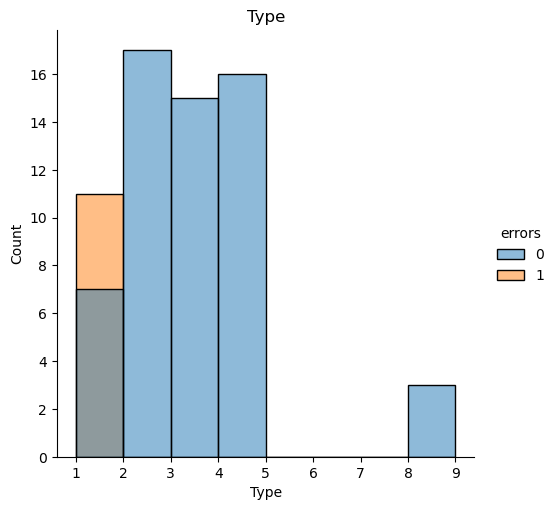

c:\Users\bena8\mambaforge\envs\py11\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 640x480 with 0 Axes>

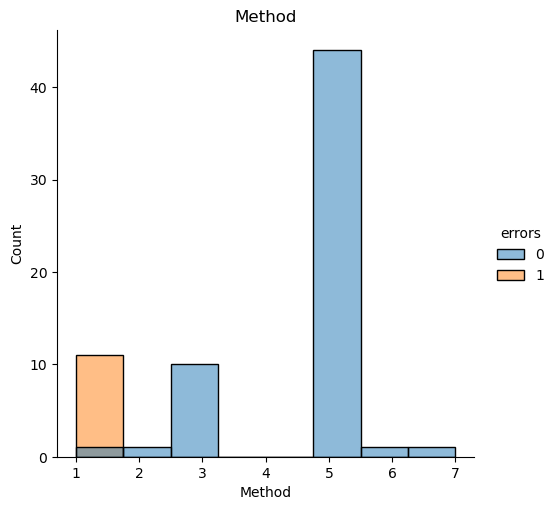

c:\Users\bena8\mambaforge\envs\py11\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 640x480 with 0 Axes>

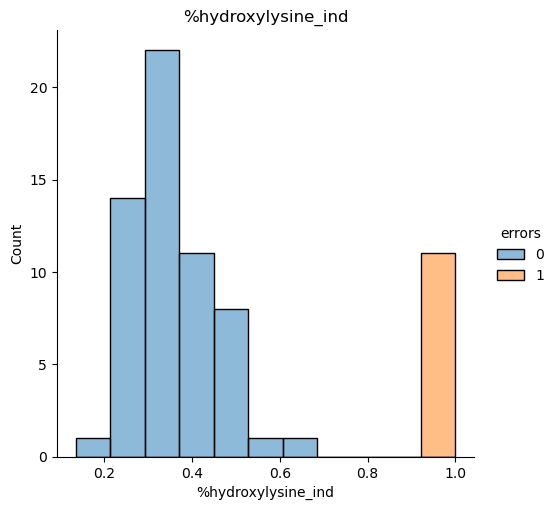

In [150]:
columns = [
    'Cell1', 'Age', 'Sex', 'Type', 'Method', '%hydroxylysine_ind'
]
for c in columns:
    plt.figure()
    sns.displot(df_final, x=c, hue="errors")
    plt.title(c)
    plt.show()

## Prediction

In [151]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_percentage_error as MAPE
from sklearn.metrics import mean_squared_error as RMSE

In [152]:
df_sel.columns

Index(['ID', 'Cell1', 'Age', 'Sex', 'Type', 'n', 'Method',
       '%hydroxylysine_ind', 'STD_n1', 'STD_n2', 'errors'],
      dtype='object')

In [153]:
x_col = ['Cell1', 'Age', 'Sex', 'Type', 'n', 'Method']
y_col = ['%hydroxylysine_ind']

In [191]:
x_train, x_test, y_train, y_test = train_test_split(df_sel[x_col], df_sel[y_col], test_size = 0.3)

In [155]:
import xgboost as xgb
xgb_r = xgb.XGBRegressor()

### Best result by random folds

In [362]:
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3)
# evaluate model
scores = cross_val_score(xgb_r, df_sel[x_col], df_sel[y_col], scoring='neg_mean_absolute_percentage_error', cv = cv, n_jobs = -1)
scores = abs(scores)
print('Mean MAPE: %.3f; Sdv MAPE: %.3f' % (scores.mean(), scores.std()) )

Mean MAPE: 0.203; Sdv MAPE: 0.091


### GridSearch

In [265]:
# https://machinelearningmastery.com/xgboost-for-regression/
xgb_r = xgb.XGBRegressor(eval_metric = 'rmsle')

#=========================================================================
# exhaustively search for the optimal hyperparameters
#=========================================================================
from sklearn.model_selection import GridSearchCV
# set up our search grid
# https://xgboost.readthedocs.io/en/latest/python/python_api.html#xgboost.XGBRegressor
param_grid = {"max_depth":    [4, 5, 6],
              "n_estimators": [700, 800, 900, 1000],
              "learning_rate": [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3],
              "colsample_bytree" : [1, 5/6, 4/6, 3/6]
              }

# try out every combination of the above values
search = GridSearchCV(xgb_r, param_grid, cv = cv).fit(x_train, y_train)

print("The best hyperparameters are ", search.best_params_)

The best hyperparameters are  {'colsample_bytree': 0.6666666666666666, 'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 700}


In [434]:
x_train, x_test, y_train, y_test = train_test_split(df_sel[x_col], df_sel[y_col], test_size = 0.2)
xgb_r = xgb.XGBRegressor(
    max_depth     = search.best_params_["max_depth"],
    n_estimators  = search.best_params_["n_estimators"],
    learning_rate = search.best_params_["learning_rate"],
    colsample_bytree = search.best_params_["colsample_bytree"],
    eval_metric='rmsle'
)

xgb_r.fit(x_train, y_train)
y_pred = xgb_r.predict(x_test)
mape = np.sqrt(MAPE(y_test, y_pred))
print(f"MAPE: {round(mape, 4)}")

rmse = np.sqrt(RMSE(y_test, y_pred))
print(f"RMSE: {round(rmse, 4)}")

MAPE: 0.3401
RMSE: 0.0535


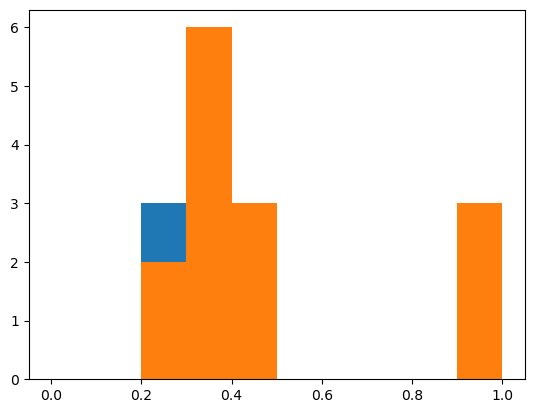

In [163]:
plt.hist(y_test, bins = [x * 0.1 for x in list(range(0, 11))])
plt.hist(y_pred, bins = [x * 0.1 for x in list(range(0, 11))])
plt.show()

## Empirical simulation

### Unit test

In [164]:
df_final['ID'].value_counts()

ID
158    39
1      11
30      4
15      3
25      2
6       1
8       1
32      1
36      1
46      1
55      1
71      1
82      1
85      1
144     1
Name: count, dtype: int64

<Axes: xlabel='ID'>

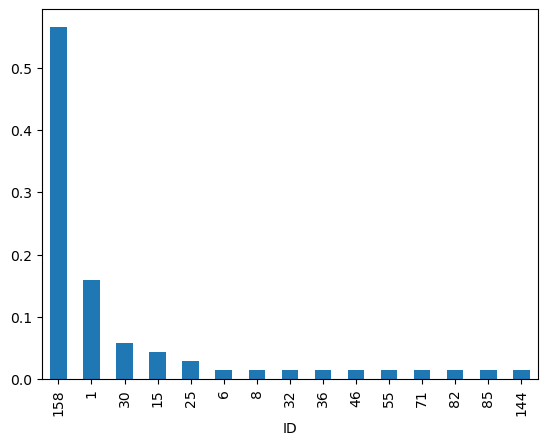

In [165]:
freq = df_final['ID'].value_counts() / sum(df_final['ID'].value_counts())
freq.plot(kind = 'bar')

In [166]:
np.random.choice(  
  a = df_final['ID'].value_counts().index,
  size = 50,
  p = df_final['ID'].value_counts() / sum(df_final['ID'].value_counts())
)

array([158, 158, 158,  25, 158, 158,   6,  32, 158, 158, 158,  71, 158,
       158, 158,   1,   8,   1, 158, 158, 158,  15,  82, 158, 158,  15,
         1,  82, 158, 158,  30, 158, 158, 158,  30,  15, 158, 158, 158,
       144, 158,  36,  25, 158, 158,   1,   1, 158,   1,  30], dtype=int64)

## Reconstruction method

In [167]:
from imblearn.combine import SMOTEENN

### Model

In [168]:
def empirical_simulator(df, col, n):
  df[col].value_counts()
  simulated_data = np.random.choice(  
    a = df[c].value_counts().index,
    size = n,
    p = df[c].value_counts() / sum(df[c].value_counts())
  )
  return simulated_data

### Simulated data

In [169]:
new_data = {}
for c in df_final.columns:
  new_data[c] = empirical_simulator(df_final, c, 1000)
df_empirical_simulated = pd.DataFrame(new_data)

### Visualization

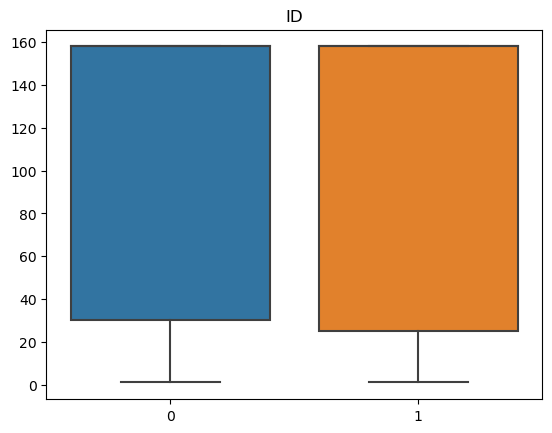

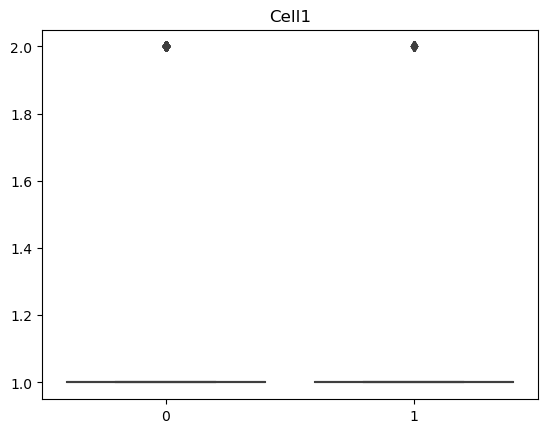

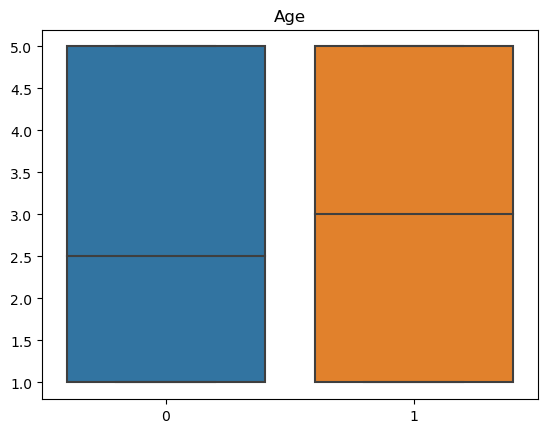

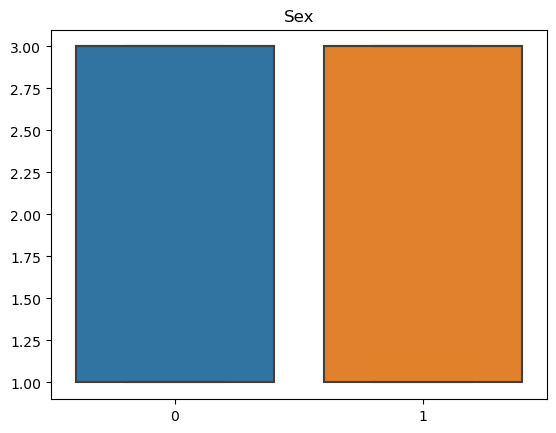

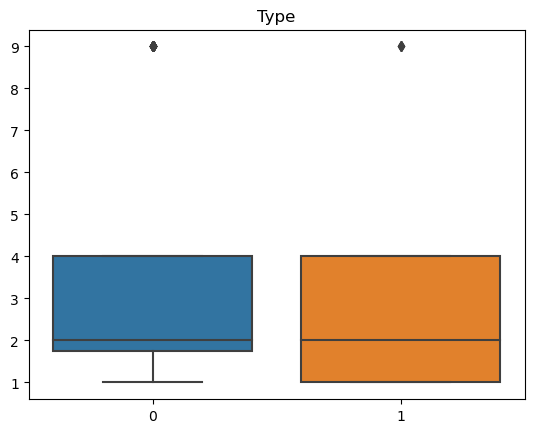

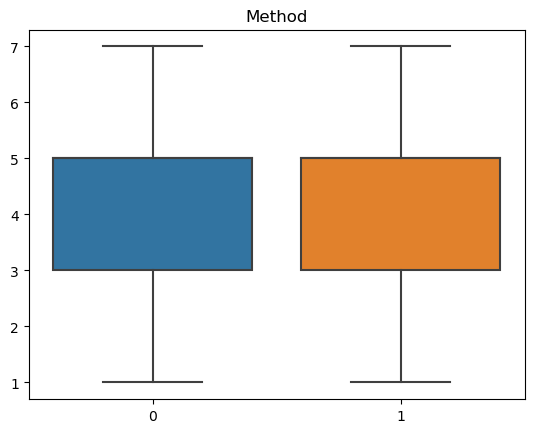

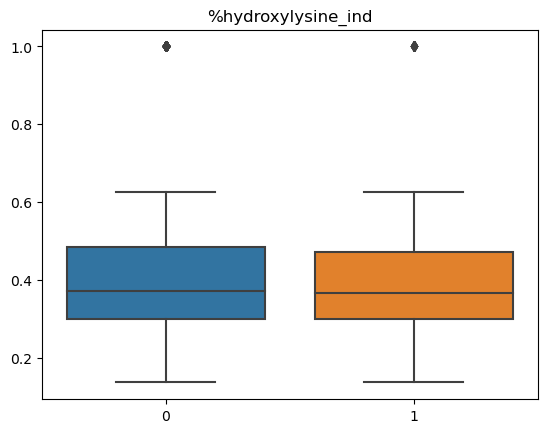

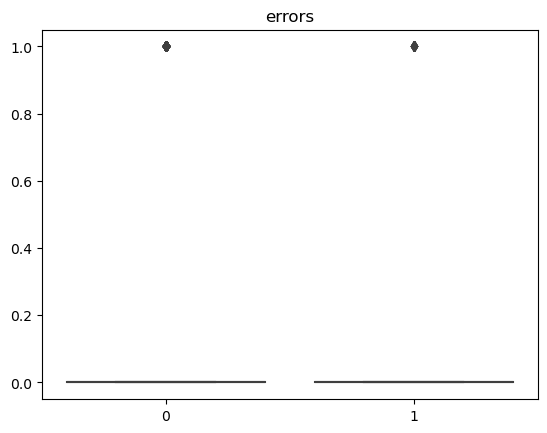

In [170]:
for c in df_final.columns:
  plt.figure()
  plt.title(c)
  sns.boxplot(
    data=[df_empirical_simulated[c], df_final[c]])
  plt.show()

## Normality simulation

In [171]:
import pingouin as pg

In [172]:
df_final.columns

Index(['ID', 'Cell1', 'Age', 'Sex', 'Type', 'Method', '%hydroxylysine_ind',
       'errors'],
      dtype='object')

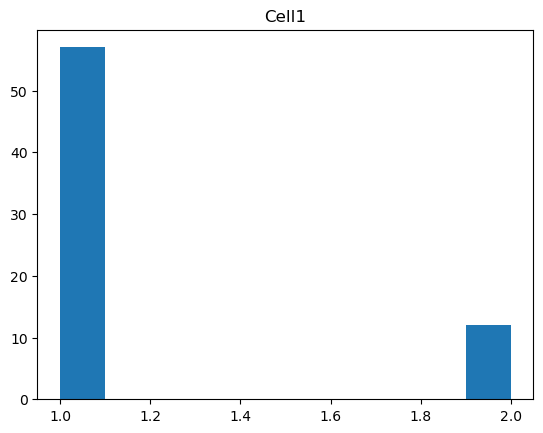

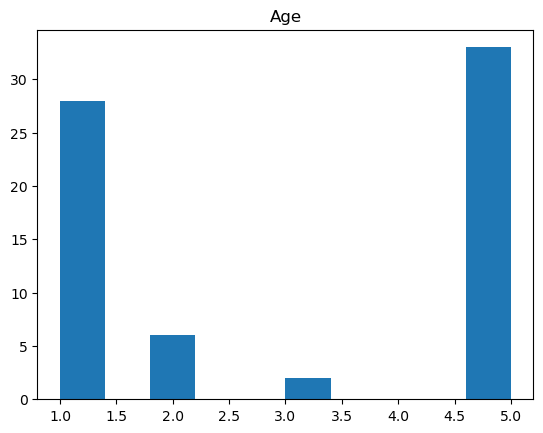

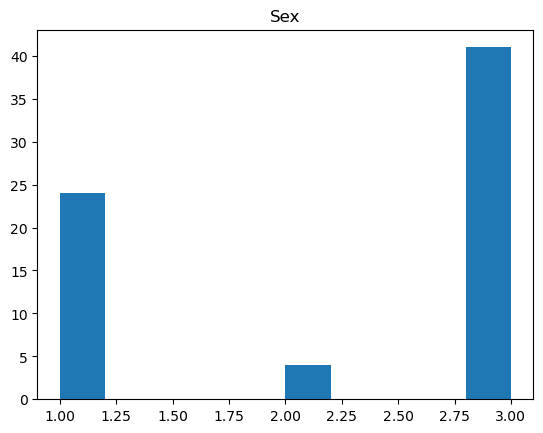

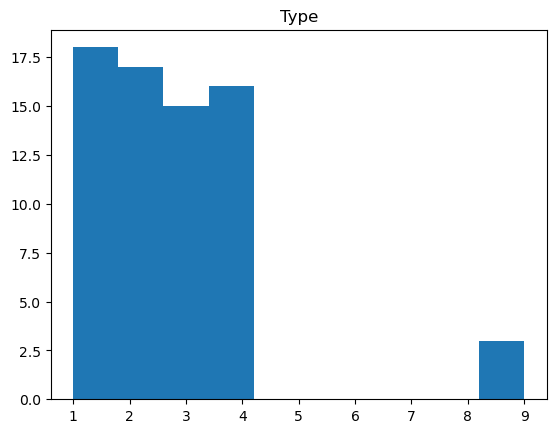

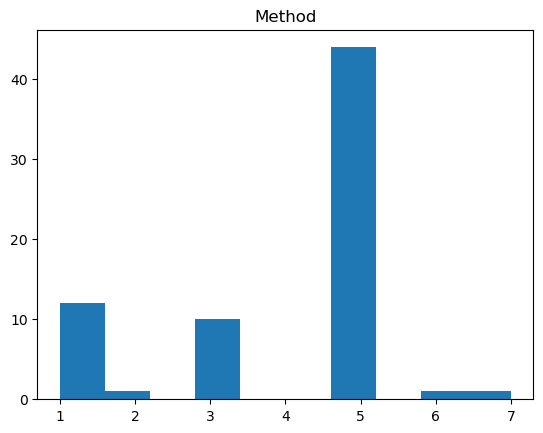

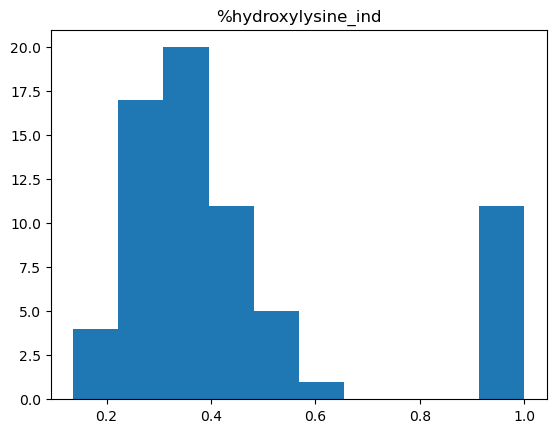

In [173]:
for c in ['Cell1', 'Age', 'Sex', 'Type', 'Method', '%hydroxylysine_ind']:
    plt.figure()
    plt.hist(df_final[c])
    plt.title(c)
    plt.show()

In [174]:
df_final.Sex.unique()

array([1, 2, 3], dtype=int64)

<Axes: xlabel='Theoretical quantiles', ylabel='Ordered quantiles'>

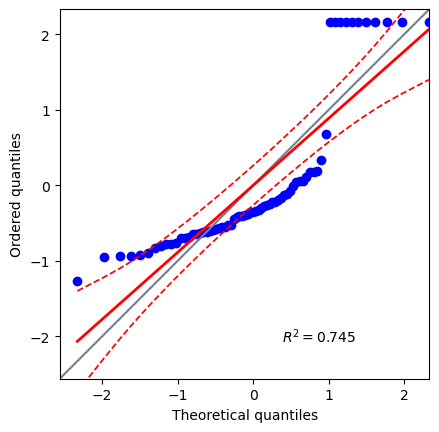

In [175]:
pg.qqplot(df_final['%hydroxylysine_ind'], dist='norm')

In [176]:
print(pg.normality(df_final['%hydroxylysine_ind']))

                           W          pval  normal
%hydroxylysine_ind  0.739249  9.521427e-10   False


- [ ] sample (increase variability)
- [ ] see distribution
- [ ] randomize

- [ ] add control patient data
- [ ] check distributions

In [177]:
import statsmodels.api as sm

In [178]:
model = sm.OLS(
    df_final['%hydroxylysine_ind'],
    df_final[['Cell1', 'Age', 'Sex', 'Type', 'Method', '%hydroxylysine_ind']]
)

In [179]:
results = model.fit()
results.params

Cell1                -1.387779e-17
Age                  -3.122502e-17
Sex                   8.326673e-17
Type                  1.804112e-16
Method               -1.075529e-16
%hydroxylysine_ind    1.000000e+00
dtype: float64